# IMPORTING LIBRARIES

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf

# DOWNLOADING DATASET

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# checking if dataset is balanced or not

In [53]:
import numpy as np
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Count the occurrences of each label in the training set
unique_train_labels, train_counts = np.unique(train_labels, return_counts=True)
train_label_counts = dict(zip(unique_train_labels, train_counts))

# Count the occurrences of each label in the test set
unique_test_labels, test_counts = np.unique(test_labels, return_counts=True)
test_label_counts = dict(zip(unique_test_labels, test_counts))

# Display the counts
print("Training set label counts:")
for label, count in train_label_counts.items():
    print(f"Label {label}: {count}")

print("\nTest set label counts:")
for label, count in test_label_counts.items():
    print(f"Label {label}: {count}")


Training set label counts:
Label 0: 5923
Label 1: 6742
Label 2: 5958
Label 3: 6131
Label 4: 5842
Label 5: 5421
Label 6: 5918
Label 7: 6265
Label 8: 5851
Label 9: 5949

Test set label counts:
Label 0: 980
Label 1: 1135
Label 2: 1032
Label 3: 1010
Label 4: 982
Label 5: 892
Label 6: 958
Label 7: 1028
Label 8: 974
Label 9: 1009


# RESHAPING THE IMAGES

In [3]:
train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0
num_classes = 10
train_labels = np.eye(num_classes)[train_labels]
test_labels = np.eye(num_classes)[test_labels]

# OLD code

In [4]:
# Define a simple feedforward neural network
input_size = 28*28
hidden_size = 128
output_size = num_classes
learning_rate = 0.1

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros(output_size)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Subtract the max for numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0
    all_predictions = []
    all_true_labels = []

    for i in range(len(train_images)):
        # Forward pass
        input_layer = train_images[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + biases_hidden
        hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        output_layer_output = softmax(output_layer_input)

        # Calculate loss (cross-entropy)
        loss = -np.sum(train_labels[i] * np.log(output_layer_output))

        # Backpropagation
        output_error = output_layer_output - train_labels[i]
        hidden_error = np.dot(output_error, weights_hidden_output.T)
        hidden_delta = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
        weights_hidden_output -= learning_rate * np.outer(hidden_layer_output, output_error)
        biases_output -= learning_rate * output_error
        weights_input_hidden -= learning_rate * np.outer(input_layer, hidden_delta)
        biases_hidden -= learning_rate * hidden_delta

        all_predictions.append(np.argmax(output_layer_output))
        all_true_labels.append(np.argmax(train_labels[i]))

    accuracy = accuracy_score(all_true_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_true_labels, all_predictions, average='macro')
    cm = confusion_matrix(all_true_labels, all_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss/len(train_images):.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

# Testing
all_test_predictions = []
all_test_true_labels = []

for i in range(len(test_images)):
    input_layer = test_images[i]
    hidden_layer_input = np.dot(input_layer, weights_input_hidden) + biases_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = softmax(output_layer_input)
    prediction = np.argmax(output_layer_output)
    all_test_predictions.append(prediction)
    all_test_true_labels.append(np.argmax(test_labels[i]))

accuracy = accuracy_score(all_test_true_labels, all_test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(all_test_true_labels, all_test_predictions, average='macro')
cm = confusion_matrix(all_test_true_labels, all_test_predictions)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}, Test Recall: {recall:.4f}, Test F1 Score: {f1:.4f}")
print("Test Confusion Matrix:")
print(cm)

Epoch 1/10, Loss: 0.0000, Accuracy: 0.8829, Precision: 0.8815, Recall: 0.8815, F1 Score: 0.8815
Confusion Matrix:
[[5549    2   50   32   10   93   70   25   67   25]
 [   1 6437   56   51    7   26   17   33   94   20]
 [  57   60 5177  149   89   33  120   82  163   28]
 [  30   35  187 5189    9  272   32   90  216   71]
 [  17   18   59   10 5156   29   80   57   60  356]
 [  96   25   43  274   60 4523  126   34  162   78]
 [  79   25   93   18   85  108 5432   13   54   11]
 [  27   48   89   64   67   39    6 5649   38  238]
 [  53   90  136  242   51  167   63   26 4890  133]
 [  38   24   27   94  342   73    8  238  132 4973]]
Epoch 2/10, Loss: 0.0000, Accuracy: 0.9379, Precision: 0.9372, Recall: 0.9372, F1 Score: 0.9372
Confusion Matrix:
[[5732    4   36    7    4   38   43    9   36   14]
 [   1 6581   31   29   12    4    9   13   44   18]
 [  39   29 5574   71   45   14   39   56   73   18]
 [   9   25   94 5601    6  162   16   42  134   42]
 [   8   16   38    4 5470   

# SAVING AND LOADING MODEL

In [16]:
np.savez('my_model.npz',
         input_layer=input_layer,
         weights_input_hidden=weights_input_hidden,
         biases_hidden=biases_hidden,
         weights_hidden_output=weights_hidden_output,
         biases_output=biases_output)

In [56]:
import numpy as np

# Load weights and biases
loaded_model = np.load('/content/my_model.npz')
weights_input_hidden = loaded_model['weights_input_hidden']
biases_hidden = loaded_model['biases_hidden']
weights_hidden_output = loaded_model['weights_hidden_output']
biases_output = loaded_model['biases_output']

# PREDICTION


### TAKING INPUT IMAGE

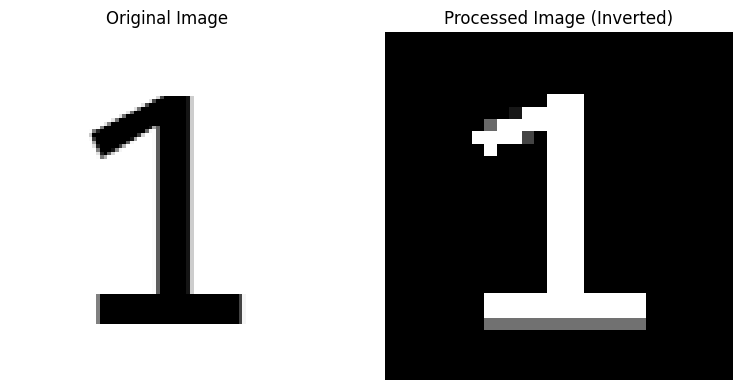

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/1.PNG', cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding to separate the digit from the background
_, thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Invert the image colors
inverted_image = 255 - thresh_image

# Resize the inverted image to 28x28
resized_image = cv2.resize(inverted_image, (28, 28))

# Normalize the resized image
normalized_image = resized_image / 255.0

# Invert the image colors again (from white to black and black to white)
final_image = 1 - normalized_image

# Flatten the image
flattened_image = final_image.reshape(1, -1)

# Display the original and processed images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Processed image
plt.subplot(1, 2, 2)
plt.imshow(final_image, cmap='gray')
plt.title('Processed Image (Inverted)')
plt.axis('off')

plt.tight_layout()
plt.show()


### PREDICTIONG RESULT

In [58]:
input_layer = flattened_image
hidden_layer_input = np.dot(input_layer, weights_input_hidden) + biases_hidden
hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
output_layer_output = softmax(output_layer_input)
prediction = np.argmax(output_layer_output)

print(prediction)

1
